<a href="https://colab.research.google.com/github/AryaPatil-25/OIBSIP/blob/Task-3/Sales_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [55]:
ad = pd.read_csv('/content/drive/MyDrive/Advertising.csv')

In [56]:
ad.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [57]:
ad.drop("Unnamed: 0", axis=1,inplace = True)

In [58]:
ad.shape

(200, 4)

In [59]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [60]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [61]:
#Checking Null values
ad.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

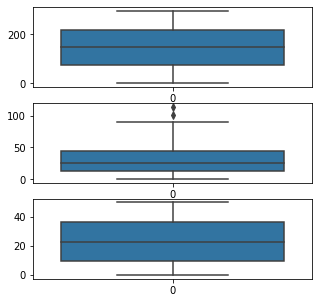

In [62]:
#Checking for Outliers
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(ad['TV'], ax = axs[0])
plt2 = sns.boxplot(ad['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(ad['Radio'], ax = axs[2])
plt.show()

Therefore, there are no considerable outliers present in the data.

**# Exploratory Data Analysis**

We perform EDA on Sales ad it is our target variable

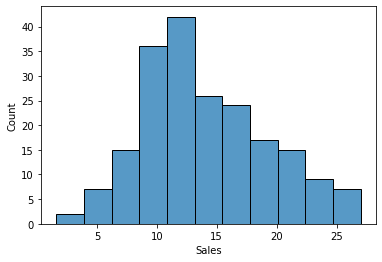

In [63]:
sns.histplot(ad['Sales'])
plt.show()

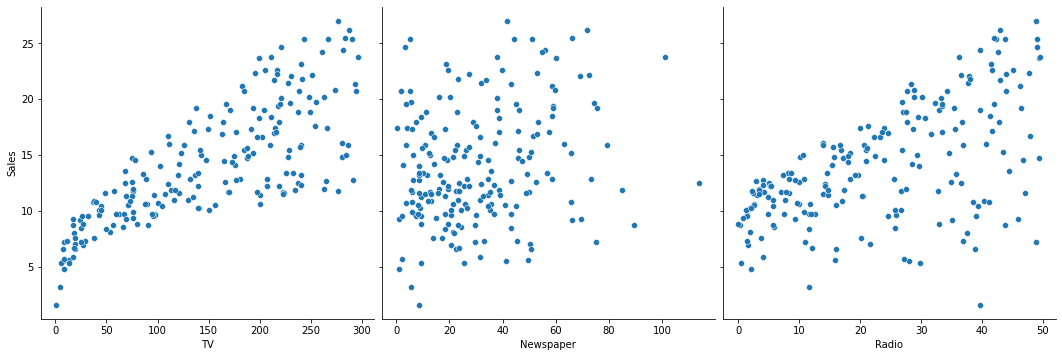

In [64]:
sns.pairplot(ad, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=5, kind='scatter')
plt.show()


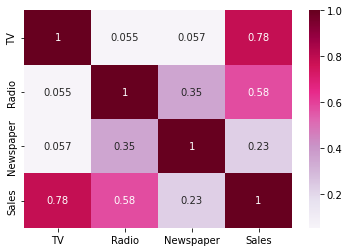

In [65]:
#Correlation
sns.heatmap(ad.corr(), cmap="PuRd", annot = True)
plt.show()

According to the heatmap, the correlation between TV and sales is the highest(0.78)

In [66]:
#Assigning the feature variable, TV to the variable X and the response variable, Sales to the variable y.
X = ad.drop('Sales',axis=1)
y = ad['Sales']

In [67]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [68]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [69]:
#Training and testing the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [72]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [73]:
model.fit(X_train,y_train)

LinearRegression()

In [74]:
#predictions
y_predictions=model.predict(X_test)
y_predictions

array([10.62160072, 20.00625302, 16.91850882, 19.17040746, 20.94974131,
       13.12284284, 11.80740696, 12.32019766, 20.57806782, 20.95662688,
       10.79096475, 19.54868702,  6.42403866, 15.23133391,  8.97226257,
        7.89897862, 16.23599497, 12.02636477, 17.09702178, 11.26080277,
       16.97826292,  9.75655721, 20.82389762, 17.20916742, 15.13816239,
       21.97290698, 19.20181841, 10.07501899, 19.39017185, 14.8673761 ,
       14.36798893,  7.55604543,  9.96742165, 14.76342565,  7.20995576,
       13.60003295,  7.49088656, 11.70865932, 13.46091883, 15.2229793 ,
       17.18088277, 13.56738329, 14.30942267, 13.72909849, 11.88559349,
        8.77039705, 12.1244102 , 19.20252289,  9.08376601,  5.15367352,
       16.22852749, 18.14111213, 12.94835466, 16.86274503, 17.86462435,
       12.33930625,  4.3575739 , 11.25904494, 16.11560622, 13.56602169])

In [75]:
#Evaluating the model
from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(y_predictions,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_predictions,y_test)))
print('R-Squared',metrics.r2_score(y_predictions,y_test))

MAE: 1.0638483124072025
RMSE: 1.3603977338130553
R-Squared 0.9012173167575984
